In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras import backend as K
from os import listdir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/My Drive/datasets/FER_2013.zip" -d "/content/drive/My Drive/datasets"

replace /content/drive/My Drive/datasets/FER_2013/images/AJ_Cook_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: ajcook
replace /content/drive/My Drive/datasets/ajcook? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


## Load dataset

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/datasets/FER_2013/fer2013.csv")

In [ ]:
dataset.shape

(35887, 3)

In [ ]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
labels = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [ ]:
dataset['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
print(dataset.columns)

Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [ ]:
dataset.shape

(35887, 3)

In [ ]:
del(dataset['Usage'])
dataset.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


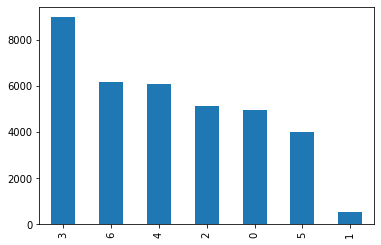

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

mapping_emotion = {'anger': 0, 'disgust': 1, 'fear': 2, 'happiness': 3, 'neutral': 6, 'sadness': 4, 'surprise': 5}

view_data = dataset

dataset['emotion'].value_counts().plot(kind='bar')

<BarContainer object of 7 artists>

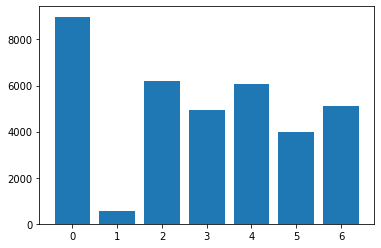

In [ ]:
plt.bar(view_data['emotion'].unique(),dataset['emotion'].value_counts())

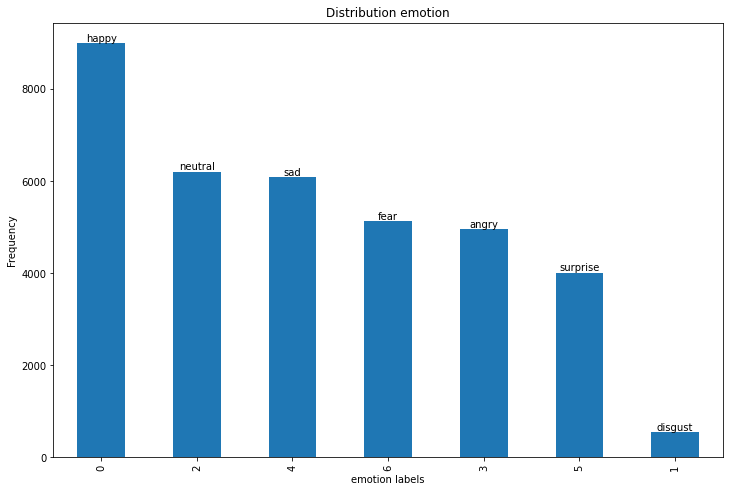

In [ ]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = dataset['emotion'].value_counts().plot(kind='bar')
ax.set_title('Distribution emotion')
ax.set_xlabel('emotion labels')
ax.set_ylabel('Frequency')
ax.set_xticklabels(dataset['emotion'].unique())

rects = ax.patches

# Make some labels.
labels_emotion = ['happy','neutral', 'sad', 'fear', 'angry', 'surprise','disgust'  ]

for rect, label in zip(rects, labels_emotion):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    
fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/emotion_bar.png')

## Define function to add data to FER2013

In [ ]:
legend_of_images = pd.read_csv("/content/drive/My Drive/datasets/FER_2013/legend.csv")

In [ ]:
legend_of_images.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [ ]:
legend_of_images.emotion.unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

In [ ]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
def get_labels(filename):
    res = legend_of_images[legend_of_images['image'] == filename]['emotion']
    res = np.array(res)
    print(res,res.shape)
    emotion = " "
    if len(res) != 0 :
        emotion=res[-1]
    else:
        return -1
    print('E: ',type(emotion))
    if emotion.lower() == 'anger':
        return 0
    elif emotion.lower() == 'happiness':
        return 3
    elif emotion.lower() == 'disgust' or emotion.lower() == 'contempt':
        return 1
    elif emotion.lower() == 'fear':
        return 2
    elif emotion.lower() == 'neutral':
        return 6
    elif emotion.lower() == 'sadness':
        return 4
    elif emotion.lower() == 'surprise':
        return 5
    else :
        return -1
    

In [ ]:
# image resize

def image_resize(path):
    img = tf.keras.preprocessing.image.load_img(path, grayscale=True, color_mode='rgb', target_size=(48, 48),interpolation='nearest')
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    img = img_arr.reshape(48,48)
    img = np.array(img)
    img = cv2.medianBlur(img, 3)
    return img

def load_datasets(dataset_directory, emotion_dataset_x, emotion_dataset_y):
    a = 0
    #get path
    path_folder = dataset_directory + '/'
    files = []
    _labels = []
    for filename in listdir(dataset_directory):
        #img = cv2.imread(path_folder+filename)
        img = image_resize(path_folder+filename)
        a = get_labels(filename)
        if a != -1:
            emotion_dataset_x.append(img)
            emotion_dataset_y.append(a)
            files.append(img)
            _labels.append(a)
            
    return emotion_dataset_x,emotion_dataset_y, files, _labels

##  reshape each pixels into (48, 48) 

In [ ]:
emotion_dataset_x = []
emotion_dataset_y = []
for data in dataset.values:
    emotion_dataset_y.append(data[0])
    emotion_dataset_x.append(np.array(data[1].split(' '), dtype='float32').reshape(48,48))
    

dir = '/content/drive/My Drive/datasets/FER_2013/images/'
emotion_dataset_x, emotion_dataset_y, add_images, add_labels = load_datasets(dir, emotion_dataset_x, emotion_dataset_y)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['sadness'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['sadness'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['happiness'] (1,)
E:  <class 'str'>
['neutral'] (1,)
E:  <class 'str'>
['happiness

In [ ]:
print("Images add to FER2013", np.array(add_images).shape, np.array(add_labels).shape)

Images add to FER2013 (13682, 48, 48) (13682,)


(49569, 48, 48) (49569,)


numpy.ndarray

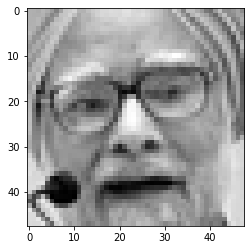

In [ ]:
## transform to array

emotion_dataset_x = np.array(emotion_dataset_x)
emotion_dataset_y = np.array(emotion_dataset_y)

print(emotion_dataset_x.shape, emotion_dataset_y.shape)

#for i in range(len(emotion_dataset_x)):
    #plt.imsave("FER_2013/toto_" + str(i) +".png",emotion_dataset_x[i], cmap="gray")
#plt.imsave("FER_2103/toto.png",emotion_dataset_x[1], cmap="gray")
plt.imshow(emotion_dataset_x[1], cmap="gray")
type(emotion_dataset_x[36000])

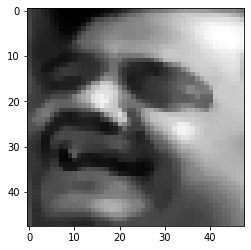

In [ ]:
plt.imshow(emotion_dataset_x[46666], cmap="gray")

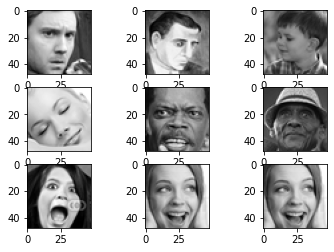

In [ ]:
fig,a =  plt.subplots(3,3)

a[0][0].imshow(emotion_dataset_x[0], cmap="gray")
a[0][1].imshow(emotion_dataset_x[466], cmap="gray")
a[0][2].imshow(emotion_dataset_x[66], cmap="gray")
a[1][0].imshow(emotion_dataset_x[666], cmap="gray")
a[1][1].imshow(emotion_dataset_x[10], cmap="gray")
a[1][2].imshow(emotion_dataset_x[4666], cmap="gray")
a[2][0].imshow(emotion_dataset_x[660], cmap="gray")
a[2][1].imshow(emotion_dataset_x[6666], cmap="gray")
a[2][2].imshow(emotion_dataset_x[6666], cmap="gray")
plt.show()

fig.savefig('/content/drive/My Drive/emotion_data.png')

## split dataset into train , validation and test sets

In [ ]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(emotion_dataset_x, emotion_dataset_y, train_size=0.8, test_size=0.2, random_state=101)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2, random_state=101)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape)
len(x_train)

(31724, 48, 48) (31724,) (9914, 48, 48) (9914,) (7931, 48, 48) (7931,)


31724

## Create Model

In [ ]:
len(labels)

7

In [ ]:
 model2 = tf.keras.Sequential([
    #1st convolution layer
    tf.keras.layers.Conv2D(64, (5, 5), activation=tf.nn.relu, input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(5,5), strides=(2, 2)),
    #2nd convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)),
    #3rd convolution layer
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)),

    tf.keras.layers.Flatten(),

    #fully connected neural networks
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),

    tf.keras.layers.Dense(len(labels), activation=tf.nn.softmax)
    
    ])

In [ ]:
inputShape = (48, 48, 1)
chanDim = -1
# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
    inputShape = (1, 48, 48)
    chanDim = 1
model = tf.keras.Sequential([ 
    
     tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation=tf.nn.relu, input_shape=inputShape),
     tf.keras.layers.BatchNormalization(axis=chanDim),
     tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
     tf.keras.layers.Dropout(0.25),

    
     tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation=tf.nn.relu),
     tf.keras.layers.BatchNormalization(axis=chanDim),
     tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation=tf.nn.relu),
     tf.keras.layers.BatchNormalization(axis=chanDim),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     tf.keras.layers.Dropout(0.25),

     
     tf.keras.layers.Conv2D(128, (3, 3), padding="same",activation=tf.nn.relu),
     tf.keras.layers.BatchNormalization(axis=chanDim),
     tf.keras.layers.Conv2D(128, (3, 3), padding="same",activation=tf.nn.relu),
     tf.keras.layers.BatchNormalization(axis=chanDim),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Flatten(),

     #fully connected neural networks
     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.25),


     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Dense(len(labels), activation=tf.nn.softmax)
])

In [ ]:
# set batch size and epoch
epochs = 1000
INIT_LR = 1e-3
batch_size = 64

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')
x_val = x_val.reshape(x_val.shape[0], 48, 48, 1)
x_val = x_val.astype('float32')

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

train_size = len(x_train)

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = generator.flow(x_train, y_train, batch_size=batch_size)
val_generator = generator.flow(x_val, y_val, batch_size=batch_size)

opt = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / epochs)

model.compile(loss='categorical_crossentropy'
, optimizer=opt
, metrics=['accuracy']
)

#model.load_weights("/content/drive/My Drive/datasets/facial_expression_model_weights.h5")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 64)       

## Fit Model

In [ ]:
histories = model.fit(train_generator,validation_data=val_generator, steps_per_epoch=train_size//batch_size, epochs=epochs, validation_steps = (len(x_val))//batch_size)

Epoch 1/1000
495/495 [==============================] - 9s 19ms/step - loss: 1.6582 - accuracy: 0.4260 - val_loss: 1.6952 - val_accuracy: 0.4393
Epoch 2/1000
495/495 [==============================] - 9s 18ms/step - loss: 1.2567 - accuracy: 0.5387 - val_loss: 1.3128 - val_accuracy: 0.5212
Epoch 3/1000
495/495 [==============================] - 9s 18ms/step - loss: 1.1236 - accuracy: 0.5842 - val_loss: 1.4795 - val_accuracy: 0.4487
Epoch 4/1000
495/495 [==============================] - 9s 18ms/step - loss: 1.0417 - accuracy: 0.6099 - val_loss: 1.4238 - val_accuracy: 0.4347
Epoch 5/1000
495/495 [==============================] - 9s 18ms/step - loss: 0.9896 - accuracy: 0.6346 - val_loss: 1.1543 - val_accuracy: 0.5711
Epoch 6/1000
495/495 [==============================] - 9s 18ms/step - loss: 0.9491 - accuracy: 0.6464 - val_loss: 1.2132 - val_accuracy: 0.5756
Epoch 7/1000
495/495 [==============================] - 9s 18ms/step - loss: 0.8997 - accuracy: 0.6654 - val_loss: 1.0033 - val_ac

# Model evaluate

In [ ]:
x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.0026222807355225086
Train accuracy: 99.85499978065491
Test loss: 2.7553484439849854
Test accuracy: 68.93281936645508


### Save Model

In [ ]:
model.save("/content/drive/My Drive/models/ER_model.h5", save_format="h5")

In [ ]:
histories.history

{'accuracy': [0.42602652311325073,
  0.5386923551559448,
  0.5842387676239014,
  0.6098862886428833,
  0.6345546245574951,
  0.6464308500289917,
  0.6653822064399719,
  0.6830385327339172,
  0.6961149573326111,
  0.7116866707801819,
  0.7270688414573669,
  0.7476942539215088,
  0.7660455107688904,
  0.7855337858200073,
  0.7957359552383423,
  0.8061907887458801,
  0.8191724419593811,
  0.8321225643157959,
  0.8461465835571289,
  0.8574541807174683,
  0.870435893535614,
  0.8745419979095459,
  0.8863550424575806,
  0.8920720219612122,
  0.8952937722206116,
  0.9036639332771301,
  0.9053379893302917,
  0.9124763011932373,
  0.9184144139289856,
  0.9168351292610168,
  0.9168983101844788,
  0.9214466214179993,
  0.9222678542137146,
  0.9320594072341919,
  0.9331333041191101,
  0.9375236630439758,
  0.9335439205169678,
  0.9381238222122192,
  0.9399873614311218,
  0.9378079771995544,
  0.9393240809440613,
  0.9434933662414551,
  0.9507896304130554,
  0.9505685567855835,
  0.9503158330917358

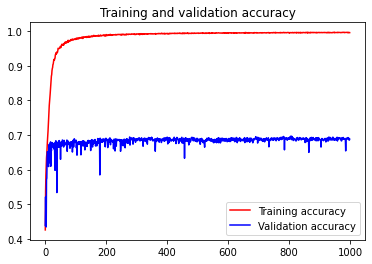

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = histories.history['accuracy']
val_acc = histories.history['val_accuracy']
loss = histories.history['loss']
val_loss = histories.history['val_loss']
#prec = histories.history['precision']
#val_prec = histories.history['val_precision']
#recall = histories.history['recall']
#val_recall = histories.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()
plt.savefig("/content/drive/My Drive/reports/train_val_acc_100_epochs_batch_64.png")

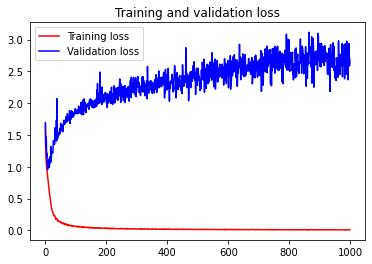

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()
plt.savefig("/content/drive/My Drive/reports/100train_val_loss_100_epochs_batch_64.png")

In [ ]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
    plt.savefig("/content/drive/My Drive/reports/100_epochs_batch_64/img_pred_100_epochs_batch_64x2.png")

In [ ]:

def frame_image(img):
   
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
   
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    img = cdf[img]
   
    return img
  
def image_processing(img):
    # Convert image to grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Modify image contrast
    R, G, B = cv2.split(img)
    R = cv2.equalizeHist(R.astype(np.uint8))
    G = cv2.equalizeHist(G.astype(np.uint8))
    B = cv2.equalizeHist(B.astype(np.uint8))
    
    img = cv2.merge((R, G, R))
    # Remove noising
    img = cv2.medianBlur(img, 3)
    return img 

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 8.8MB/s 


In [ ]:
from mtcnn.mtcnn import MTCNN

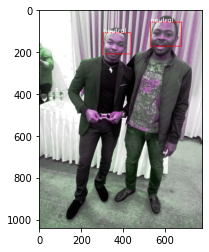

In [ ]:

img = cv2.imread("/content/drive/My Drive/datasets/01.jpg")

detector = MTCNN()


frame = image_processing(img)
# detect faces in the image
faces = detector.detect_faces(frame)

for face in faces:

    x, y, h, w = face['box']
    # gray_face = gray_image[h:w, x:y]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    detected_face = frame[int(y):int(y+h), int(x):int(x+w)] #crop detected face
    detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
    detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48
    
    img_pixels = np.array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels = img_pixels.reshape(img_pixels.shape[0], 48, 48, 1)
    img_pixels = img_pixels.astype('float32')
      
    img_pixels /= 255
      
    predictions = model.predict(img_pixels)
      
    #find max indexed array
    max_index = np.argmax(predictions[0])
      
    emotion = labels[max_index]
      
    cv2.putText(frame, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    
    plt.imshow(frame,cmap='gray')
    cv2.imwrite("/content/drive/My Drive/reports/img_emotion-{}.jpg".format(np.random.randint(0,1000)), frame)

cv2.destroyAllWindows()


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
#!pip install mtcnn
from mtcnn.mtcnn import MTCNN

VIDEO_PATH = "/content/drive/My Drive/datasets/test_exam.mp4"
cap = cv2.VideoCapture(VIDEO_PATH)

detector = MTCNN()

while cap.isOpened(): # True:
    ret, frame = cap.read()
    frame = image_processing(frame)
    # detect faces in the image
    faces = detector.detect_faces(frame)

    for face in faces:

        x, y, h, w = face['box']
       # gray_face = gray_image[h:w, x:y]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        detected_face = frame[int(y):int(y+h), int(x):int(x+w)] #crop detected face
        detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
        detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48
        
        img_pixels = image.img_to_array(detected_face)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
         
        img_pixels /= 255
         
        predictions = model.predict(img_pixels)
         
        #find max indexed array
        max_index = np.argmax(predictions[0])
         
        emotion = labels[max_index]
         
        cv2.putText(frame, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        
        plt.imshow( frame, cmap="gray")
        cv2.imwrite("/content/drive/My Drive/reports/emotions/test1/img_emotion-{}.jpg".format(np.random.randint(0,100000)), frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
# build corresponding predict label
def match_pred_label(y_pred):
   pred = []

   # index
   indice_max = -1
   for pred_res in y_pred:
     pred_max = max(pred_res)
     for i in range(len(pred_res)):
       if pred_res[i] == pred_max:
         pred.append(i)
    
   return pred


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[4.0059640e-06, 8.3328918e-18, 3.4686121e-08, ..., 2.1896709e-07,
        8.1460564e-22, 9.9999571e-01],
       [1.7059094e-06, 3.7915115e-09, 8.6126342e-08, ..., 1.8418129e-07,
        4.2059536e-10, 9.9999797e-01],
       [4.7475923e-02, 1.5252874e-11, 2.1455287e-08, ..., 9.5072639e-01,
        2.5832437e-11, 1.7976471e-03],
       ...,
       [3.5437676e-01, 1.1742202e-06, 4.4238665e-03, ..., 7.5991346e-05,
        1.6601125e-04, 3.2683194e-03],
       [4.4767498e-10, 6.0470491e-09, 2.0210782e-12, ..., 1.0766689e-09,
        1.4419338e-11, 5.5817270e-01],
       [4.5384479e-01, 4.3474870e-08, 5.3230149e-04, ..., 4.6146147e-06,
        5.4445511e-01, 1.1631679e-03]], dtype=float32)

In [ ]:
pred = match_pred_label(y_pred=y_pred)
print(len(pred),pred)
print(len(y_pred))

9914 [6, 6, 4, 0, 6, 6, 5, 6, 6, 6, 6, 3, 3, 3, 5, 3, 3, 4, 4, 3, 1, 5, 6, 6, 3, 6, 0, 3, 3, 3, 1, 0, 5, 6, 6, 3, 6, 6, 3, 4, 6, 3, 0, 2, 2, 3, 6, 4, 4, 6, 0, 6, 2, 4, 0, 1, 6, 3, 3, 3, 5, 4, 5, 0, 3, 3, 3, 6, 3, 3, 5, 4, 6, 6, 6, 2, 6, 3, 6, 3, 4, 6, 4, 6, 3, 6, 3, 4, 6, 4, 6, 3, 6, 2, 3, 4, 3, 6, 6, 4, 6, 3, 5, 0, 3, 3, 6, 4, 6, 3, 4, 0, 5, 6, 4, 2, 3, 2, 6, 3, 6, 5, 6, 0, 0, 6, 2, 6, 3, 2, 3, 6, 4, 4, 6, 3, 6, 6, 3, 2, 4, 6, 4, 3, 6, 2, 6, 4, 6, 6, 3, 3, 5, 3, 0, 4, 0, 5, 3, 4, 6, 2, 6, 3, 0, 0, 2, 0, 2, 6, 5, 0, 3, 6, 6, 0, 4, 3, 3, 6, 3, 2, 3, 3, 0, 3, 2, 5, 4, 3, 6, 3, 6, 3, 2, 6, 3, 4, 3, 0, 6, 4, 6, 6, 4, 3, 3, 4, 3, 6, 6, 3, 6, 6, 4, 3, 5, 6, 5, 6, 3, 4, 3, 3, 2, 3, 6, 3, 6, 4, 6, 6, 6, 4, 3, 6, 6, 4, 3, 6, 1, 2, 4, 0, 6, 2, 6, 6, 0, 6, 3, 0, 6, 6, 5, 3, 2, 3, 5, 3, 2, 6, 6, 4, 0, 6, 4, 3, 3, 5, 0, 3, 3, 2, 4, 5, 3, 6, 6, 5, 4, 0, 4, 3, 0, 4, 2, 4, 3, 0, 6, 6, 6, 4, 6, 2, 0, 5, 6, 3, 6, 3, 3, 3, 6, 4, 3, 6, 4, 6, 2, 3, 3, 3, 3, 3, 2, 5, 3, 2, 6, 1, 0, 5, 2, 4, 5, 0, 5, 4, 6, 5

In [ ]:
y = match_pred_label(y_test)
print(y)

[6, 6, 4, 0, 3, 6, 5, 6, 6, 6, 6, 3, 3, 3, 5, 3, 3, 4, 2, 3, 0, 5, 6, 6, 3, 6, 0, 3, 3, 6, 1, 0, 5, 6, 2, 3, 6, 0, 3, 4, 6, 3, 0, 1, 0, 3, 4, 3, 0, 6, 0, 6, 4, 4, 4, 1, 3, 3, 3, 3, 5, 2, 5, 0, 3, 3, 3, 6, 3, 3, 2, 0, 6, 6, 6, 0, 6, 6, 3, 3, 4, 6, 4, 6, 3, 0, 3, 4, 2, 4, 0, 3, 6, 3, 3, 4, 3, 6, 6, 4, 6, 3, 3, 0, 3, 3, 0, 0, 6, 3, 6, 0, 5, 0, 6, 2, 3, 0, 6, 3, 0, 5, 6, 0, 0, 6, 2, 6, 3, 2, 3, 2, 3, 4, 6, 3, 6, 6, 3, 5, 2, 4, 4, 3, 4, 4, 6, 0, 6, 6, 3, 3, 2, 3, 0, 2, 1, 5, 3, 4, 0, 2, 2, 3, 4, 2, 2, 0, 2, 4, 5, 0, 3, 6, 2, 0, 2, 0, 3, 6, 3, 4, 3, 3, 0, 0, 2, 5, 3, 3, 4, 3, 6, 1, 2, 6, 3, 2, 3, 0, 0, 4, 6, 6, 3, 3, 3, 2, 3, 0, 6, 3, 6, 6, 0, 3, 3, 2, 4, 6, 3, 6, 3, 3, 2, 3, 6, 3, 3, 4, 3, 6, 4, 4, 3, 3, 0, 4, 2, 6, 1, 2, 4, 5, 0, 2, 6, 6, 4, 0, 3, 3, 6, 6, 2, 3, 2, 3, 5, 3, 5, 6, 6, 1, 6, 6, 6, 3, 3, 2, 2, 3, 3, 2, 4, 5, 3, 3, 3, 2, 0, 0, 4, 3, 4, 3, 0, 4, 3, 0, 6, 6, 6, 2, 6, 2, 5, 3, 6, 3, 6, 3, 3, 0, 3, 4, 3, 6, 6, 3, 4, 3, 3, 6, 6, 3, 0, 2, 3, 4, 6, 1, 0, 2, 2, 6, 5, 0, 5, 0, 6, 5, 4, 

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y, pred)
print(cf_matrix)

[[ 476   14   82   74  130   36  190]
 [  29   77    6   14   12    4   11]
 [  86    5  420   55  184  135  143]
 [  50    5   41 2523   83   44  261]
 [ 117    8  132   71  644   26  270]
 [  22    1   56   29   14  694   83]
 [  81    1   65  180  200   30 2000]]


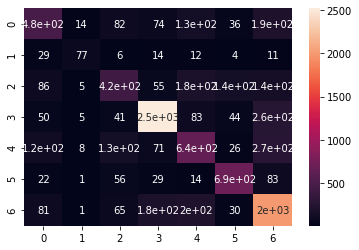

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

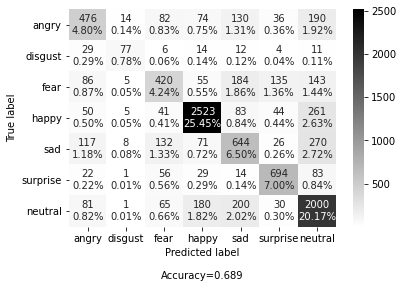

In [ ]:
_labels = ['True Neg','False Pos','False Neg','True Pos']
make_confusion_matrix(cf_matrix, group_names=_labels,categories=labels, cmap='binary')

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y, pred, target_names=labels))


Classification Report

              precision    recall  f1-score   support

       angry       0.55      0.48      0.51      1002
     disgust       0.69      0.50      0.58       153
        fear       0.52      0.41      0.46      1028
       happy       0.86      0.84      0.85      3007
         sad       0.51      0.51      0.51      1268
    surprise       0.72      0.77      0.74       899
     neutral       0.68      0.78      0.73      2557

    accuracy                           0.69      9914
   macro avg       0.65      0.61      0.63      9914
weighted avg       0.68      0.69      0.68      9914

